<a href="https://colab.research.google.com/github/Vrushti-kulkarni/linear_regression/blob/main/Linear_Regression_%26_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [334]:
df = pd.read_csv('/content/automobile_data (1).csv')

# ***DATA CLEANING***

In [335]:
df.shape

(205, 26)

In [336]:
df.dtypes

,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


In [337]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [338]:
df.replace('?', np.nan, inplace=True)

In [339]:
df.isnull().sum()

,0
symboling,0
normalized-losses,41
make,0
fuel-type,0
aspiration,0
num-of-doors,2
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


In [340]:
x = df.isnull().sum()/len(df) *100
x = x[x>0]
print(x)

normalized-losses    20.00000
num-of-doors          0.97561
bore                  1.95122
stroke                1.95122
horsepower            0.97561
peak-rpm              0.97561
price                 1.95122
dtype: float64


In [341]:
df[df['bore'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645


In [342]:
df.dropna(subset = ['bore','num-of-doors','stroke','horsepower','peak-rpm','price'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [343]:
df.shape
#lost only 8 rows

(193, 26)

In [344]:
df['normalized-losses'].fillna(0, inplace = True)

In [345]:
#CONVERTING DATATYPE
df['normalized-losses'] =df['normalized-losses'].astype(int)

In [346]:
df['normalized-losses'].fillna(df['normalized-losses'].mean(), inplace = True)

In [347]:
x = df.isnull().sum()
x[x>0]

,0


In [348]:
dict = {'two':2, 'four':4}
df['num-of-doors'] = df['num-of-doors'].replace(dict)

In [349]:
#CONVERTING DATA TYPE
df['num-of-doors'] = df['num-of-doors'].astype(int)

In [350]:
df['make'].value_counts()

,count
make,
toyota,32
nissan,18
honda,13
mitsubishi,13
volkswagen,12
subaru,12
mazda,12
volvo,11
peugot,11


In [351]:
df['body-style'].value_counts()


,count
body-style,
sedan,92
hatchback,63
wagon,24
hardtop,8
convertible,6


In [352]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'eight'], dtype=object)

In [353]:
#REPLACING STRING VALUES/OBJECTS WITH NUMERICAL VALUES
dict = {'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'eight':8}
df['num-of-cylinders'] = df['num-of-cylinders'].replace(dict)

In [354]:
#CONVERTING DATATYPES
df['num-of-cylinders'] = df['num-of-cylinders'].astype(int)

In [355]:
#CONVERTIN DATATYPES
df['bore'] = df['bore'].astype(float)
df['stroke'] = df['stroke'].astype(float)
df['price'] = df['price'].astype(float)
df['horsepower'] = df['horsepower'].astype(int)
df['peak-rpm'] = df['peak-rpm'].astype(int)
df['highway-mpg'] = df['highway-mpg'].astype(float)
df['city-mpg'] = df['city-mpg'].astype(float)


In [356]:
df.dtypes

,0
symboling,int64
normalized-losses,int64
make,object
fuel-type,object
aspiration,object
num-of-doors,int64
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


***CORRELATION***

In [357]:

corr_cols = ['horsepower', 'peak-rpm', 'city-mpg','highway-mpg','price','num-of-cylinders']

In [358]:
corr = df[corr_cols].corr()

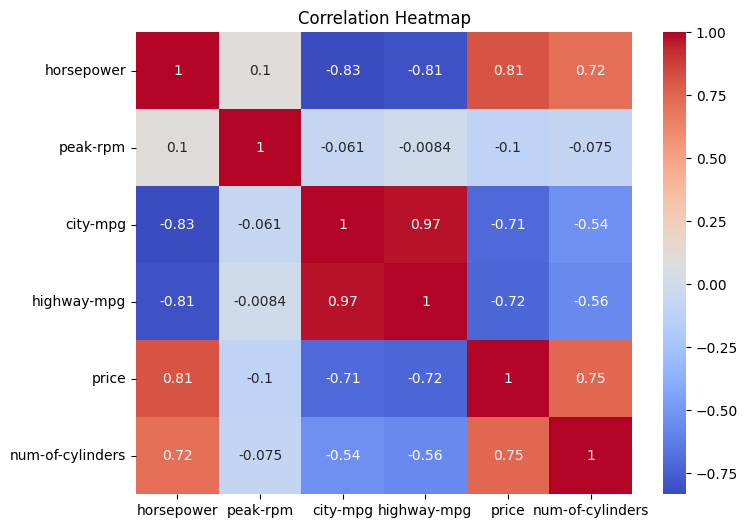

In [359]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**OBSERVATION 1**

*   ***from this heatmap it was observed that higher the highway mileage, lower the price, showing moderate to high inverse correlation between price and highway mpg***
*   ***the inverse correlation between city mileage and price was also observed, the correlation coefficient is moderate to high***
*   ***inverse relationship between horsepower and mileage can also be observed***





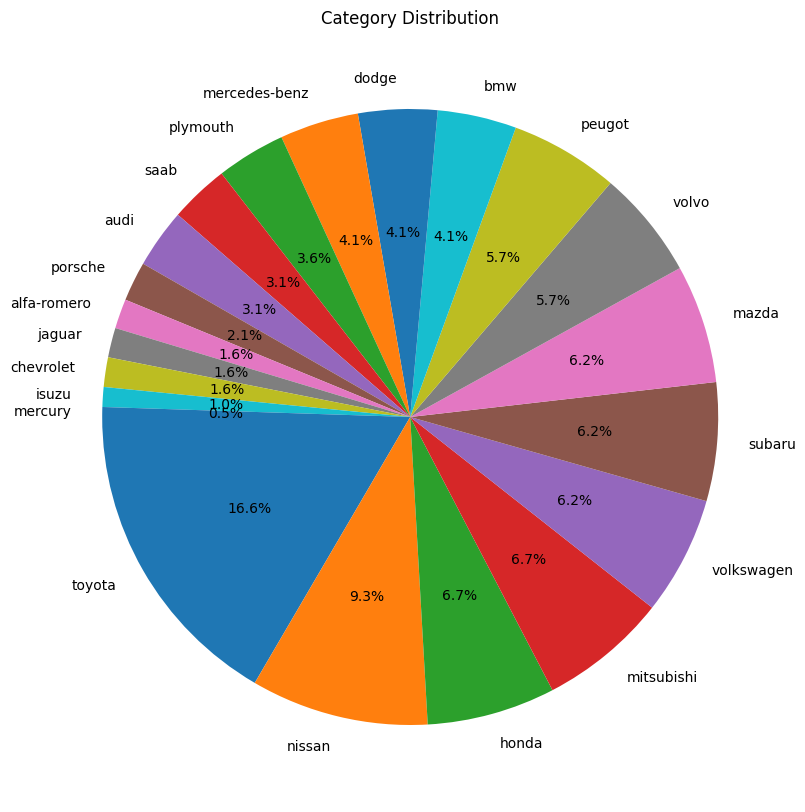

In [360]:
df['make'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%', startangle = 180)
plt.title("Category Distribution")
plt.ylabel('')
plt.show()

**OBSERVATION 2**

***toyota has the highest percentage of automobile in the given data***

In [361]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495.0
1,3,0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500.0
2,1,0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500.0
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950.0
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450.0


In [362]:
df = df.reset_index()

*GROUPING BY MAKE AND FINDING MEAN PRICE*

In [363]:
mean_price = df.groupby('make')['price'].mean()

In [364]:
mean_price = mean_price.sort_values(ascending=False)

In [365]:
mean_price = mean_price.to_frame()

In [366]:
mean_price = mean_price.reset_index()

Text(0, 0.5, 'Average Price')

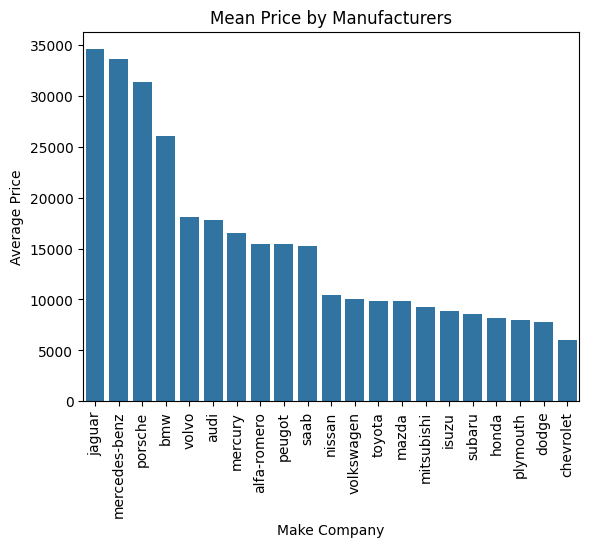

In [367]:
sns.barplot(x='make', y='price', data=mean_price)
plt.title('Mean Price by Manufacturers')
plt.xlabel('Make Company')
plt.xticks(rotation=90)
plt.ylabel('Average Price')

In [368]:
df_symbolling = df.sort_values('symboling',ascending = False)

<ipython-input-369-7ec16e316177>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_symbolling['symboling'], shade=True)


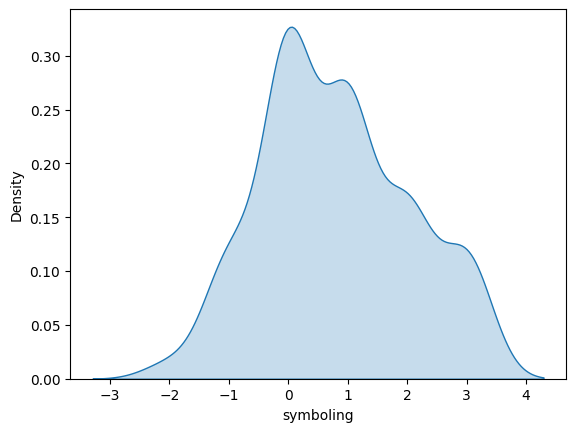

In [369]:
sns.kdeplot(df_symbolling['symboling'], shade=True)
plt.show()


***KDE graph to observe the likeliness of which symboling***

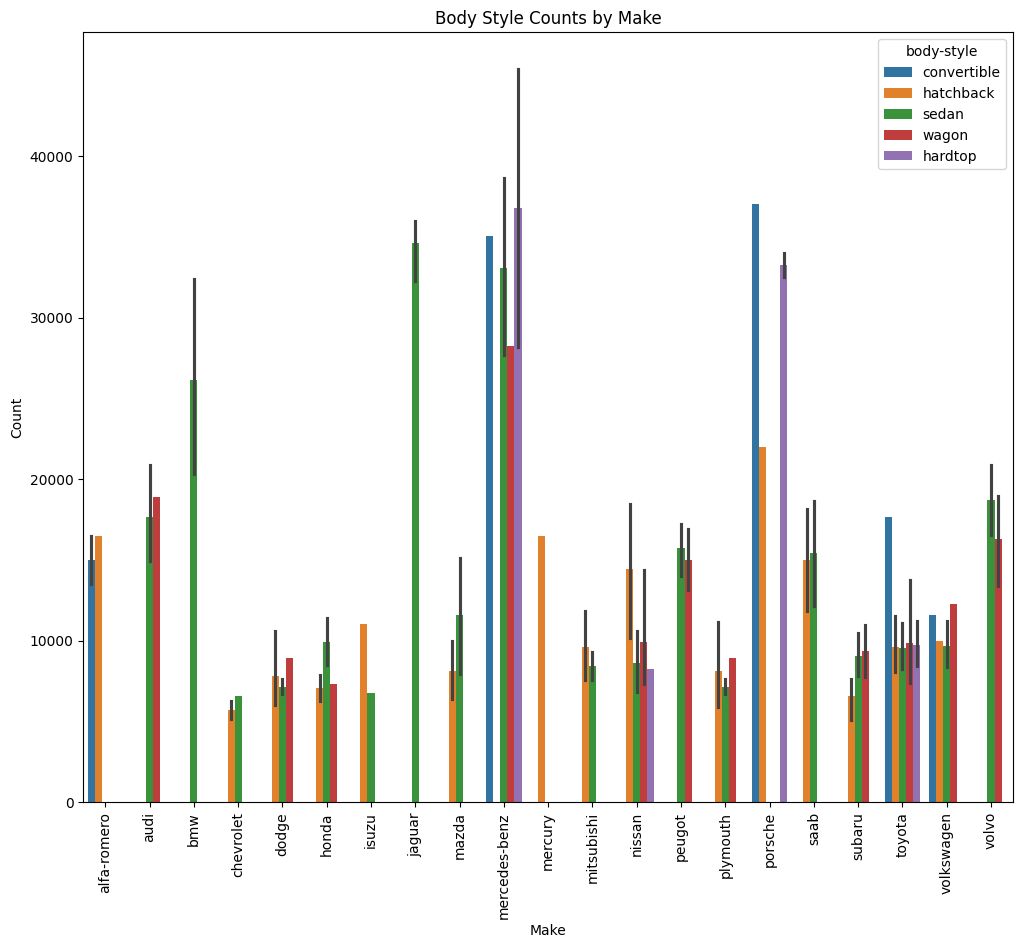

In [370]:
plt.figure(figsize = (12,10))
sns.barplot(x = 'make', y = 'price', hue='body-style', data = df)
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Body Style Counts by Make')
plt.xticks(rotation=90)
plt.show()

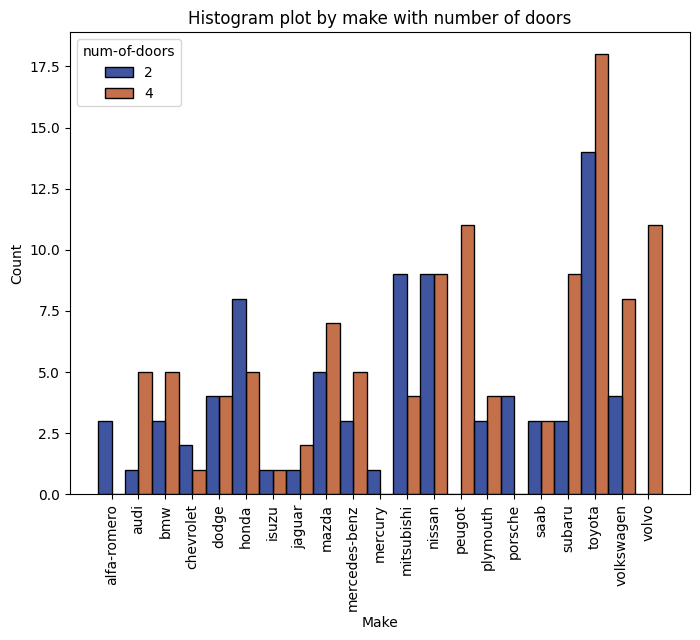

In [371]:
plt.figure(figsize = (8,6))
sns.histplot(x='make', hue='num-of-doors', data=df, palette='dark', multiple = 'dodge', )
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Histogram plot by make with number of doors')
plt.xticks(rotation=90)
plt.show()
#why are there extra colours?

In [372]:
df.dtypes

,0
index,int64
symboling,int64
normalized-losses,int64
make,object
fuel-type,object
aspiration,object
num-of-doors,int64
body-style,object
drive-wheels,object
engine-location,object


***another correlation***

In [373]:
corr_cols = ['curb-weight','engine-size','horsepower','price']

In [374]:
corr = df[corr_cols].corr()

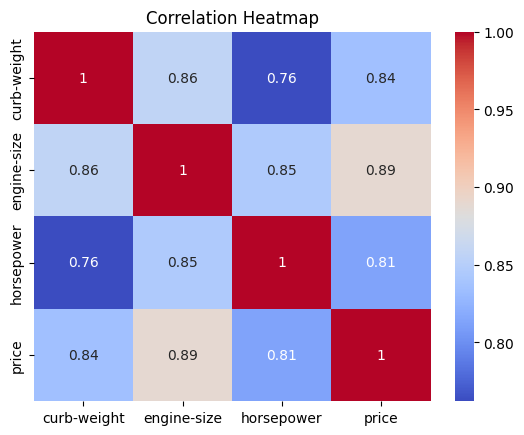

In [375]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

***Heavy to moderate proportional correlation between horsepower, engine-size, curb-weight and price***

In [376]:
df.dtypes

,0
index,int64
symboling,int64
normalized-losses,int64
make,object
fuel-type,object
aspiration,object
num-of-doors,int64
body-style,object
drive-wheels,object
engine-location,object


# ***ONE HOT ENCODING***

In [377]:
from sklearn.preprocessing import OneHotEncoder

In [378]:
encoder = OneHotEncoder(sparse_output=False, drop='first')

In [379]:
encoded_cols = encoder.fit_transform(df[['make', 'fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type','fuel-system']])

In [380]:
one_hot_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['make', 'fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type','fuel-system']))

In [381]:
df_encoded = pd.concat([df, one_hot_df], axis=1)

In [382]:
df_encoded = df_encoded.drop(['make', 'fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type','fuel-system'], axis = 1)

In [383]:
df_encoded.dtypes

,0
index,int64
symboling,int64
normalized-losses,int64
num-of-doors,int64
wheel-base,float64
length,float64
width,float64
height,float64
curb-weight,int64
num-of-cylinders,int64


In [384]:
df_encoded.drop('index', axis=1, inplace=True)

In [385]:
df_encoded.shape

(193, 57)

In [386]:
corr = df_encoded.corr()

*slightly jumbled heatmap after one hot encoding*

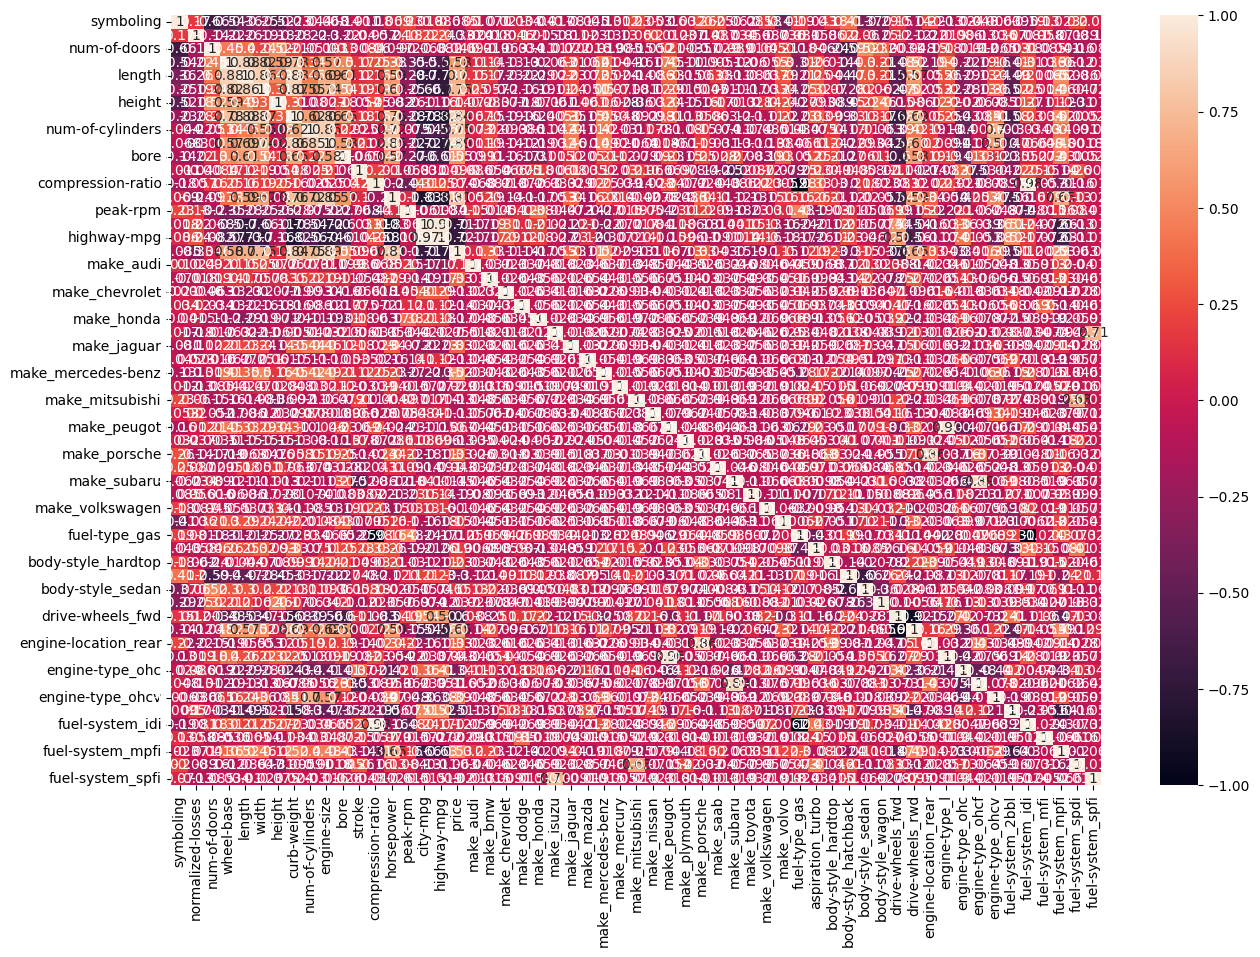

In [387]:
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True)
plt.show()

# **PCA**

In [388]:
from sklearn.decomposition import PCA

In [389]:
pca = PCA()

In [390]:
df_encoded.columns

Index(['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'make_audi', 'make_bmw',
       'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_saab', 'make_subaru', 'make_toyota',
       'make_volkswagen', 'make_volvo', 'fuel-type_gas', 'aspiration_turbo',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'drive-wheels_fwd', 'drive-wheels_rwd',
       'engine-location_rear', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-type_ohcv', 'fuel-system_2bbl',
       'fuel-system_idi', 'fuel-system_mfi', 'fuel-system_mpfi',
       

In [391]:
features = ['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'make_audi', 'make_bmw',
       'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_saab', 'make_subaru', 'make_toyota',
       'make_volkswagen', 'make_volvo', 'fuel-type_gas', 'aspiration_turbo',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'drive-wheels_fwd', 'drive-wheels_rwd',
       'engine-location_rear', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-type_ohcv', 'fuel-system_2bbl',
       'fuel-system_idi', 'fuel-system_mfi', 'fuel-system_mpfi',
       'fuel-system_spdi', 'fuel-system_spfi']

In [392]:
x = df_encoded.loc[:,features].values

In [393]:
y = df_encoded.loc[:,'price'].values

In [394]:
from sklearn.preprocessing import StandardScaler

In [395]:
sc = StandardScaler()

In [396]:
scaled_data = sc.fit(x)

In [397]:
scaled_data = sc.transform(x)

In [398]:
pca.fit(scaled_data)

PCA()

***figuring out the number of components using explained variance ratio***

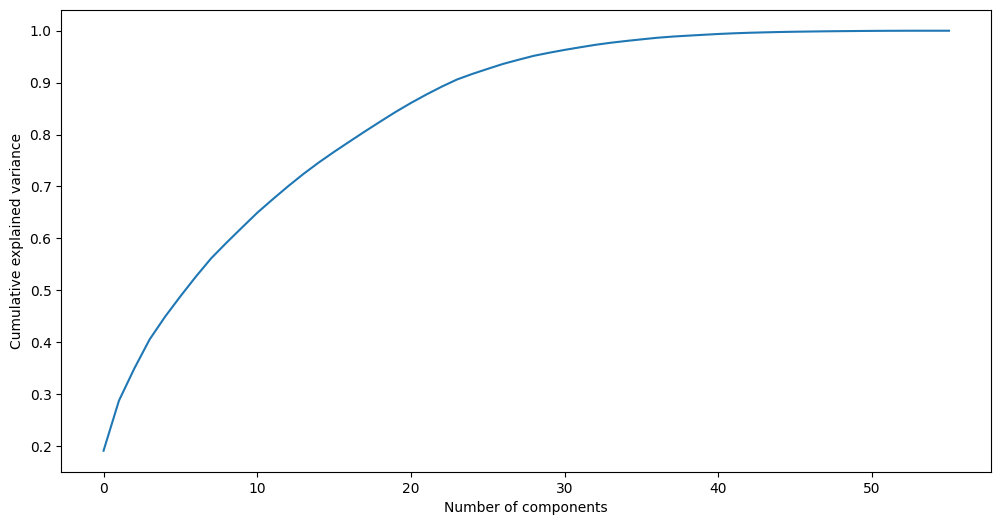

In [399]:
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

***somewhere between 18-25 components gives a 80%-90% retained variance***

In [400]:
pca = PCA(n_components = 20)

In [401]:
pca.fit(scaled_data)

PCA(n_components=20)

In [402]:
x_pca = pca.transform(scaled_data)

In [403]:
x_pca = pd.DataFrame(x_pca)

In [404]:
x_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.321699,2.629847,0.692978,1.556649,-0.291835,0.203979,1.103025,-0.027993,0.717466,0.537395,-0.608130,-0.561390,0.529644,0.595247,-0.365391,0.709411,-0.319173,-0.152893,0.099731,0.109305
1,0.321699,2.629847,0.692978,1.556649,-0.291835,0.203979,1.103025,-0.027993,0.717466,0.537395,-0.608130,-0.561390,0.529644,0.595247,-0.365391,0.709411,-0.319173,-0.152893,0.099731,0.109305
2,1.797274,2.829598,-1.255835,0.506128,1.219638,-1.708647,1.303045,-0.828668,0.578453,0.253012,1.335973,-0.883336,1.196846,0.592330,0.075581,0.905620,-0.352640,-0.148151,0.052907,0.091457
3,-0.368424,0.192657,-0.392908,-2.452016,0.054828,2.017661,-1.056061,-1.470779,1.216992,0.763597,0.113477,0.290391,-1.602838,0.209491,-0.691734,-2.254434,-0.244112,1.798438,2.418868,2.292368
4,1.324468,1.046093,-0.465859,-2.491636,0.011478,1.741094,-0.761085,-1.206045,1.131969,0.609052,-0.000621,0.330632,-1.521281,0.302797,-0.775890,-2.368443,-0.527407,1.720441,2.320937,2.426424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,3.324227,-0.671255,0.970703,-2.365201,-0.534777,1.534970,0.306880,1.383147,-1.106928,-0.406817,-1.131748,0.551119,1.811376,-1.443493,0.511322,0.227739,1.489498,0.769267,0.443893,-0.111195
189,4.159362,-0.511919,0.414344,-2.038261,-1.517395,1.499705,-0.353001,1.444301,-1.201217,-0.231010,-1.243400,0.859607,2.094043,-1.784673,0.521665,0.463168,1.524453,0.852816,0.462079,0.079035
190,5.080747,0.881022,1.180767,-2.226781,0.818639,-0.535431,0.291310,-0.190070,-0.203417,-0.645745,-0.190015,0.210280,2.602838,-1.947932,0.397714,0.561805,1.332344,0.968500,0.336682,-0.235663
191,3.619119,-4.888005,-1.796568,0.848709,0.902678,1.000951,-0.904498,1.121793,-0.603815,-0.279918,-0.915167,0.783847,2.751471,-1.480704,0.494414,0.218583,1.229897,1.210734,-0.133526,0.495228


Text(0, 0.5, 'Principal Component 3')

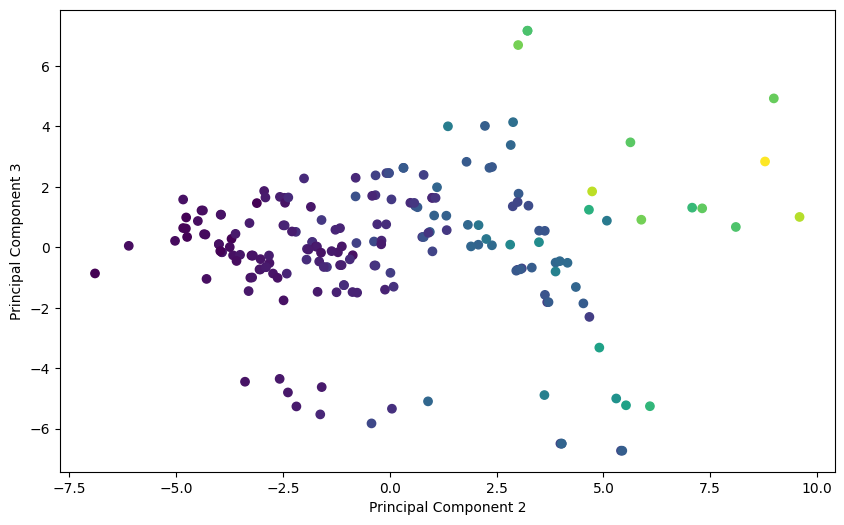

In [405]:
plt.figure(figsize=(10,6))
plt.scatter(x_pca[0], x_pca[1],c = df_encoded['price'])
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')

In [406]:
finalDF  = pd.concat([x_pca, df_encoded[['price']]], axis = 1)

In [407]:
finalDF.head(5)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,price
0,0.321699,2.629847,0.692978,1.556649,-0.291835,0.203979,1.103025,-0.027993,0.717466,0.537395,...,-0.561390,0.529644,0.595247,-0.365391,0.709411,-0.319173,-0.152893,0.099731,0.109305,13495.0
1,0.321699,2.629847,0.692978,1.556649,-0.291835,0.203979,1.103025,-0.027993,0.717466,0.537395,...,-0.561390,0.529644,0.595247,-0.365391,0.709411,-0.319173,-0.152893,0.099731,0.109305,16500.0
2,1.797274,2.829598,-1.255835,0.506128,1.219638,-1.708647,1.303045,-0.828668,0.578453,0.253012,...,-0.883336,1.196846,0.592330,0.075581,0.905620,-0.352640,-0.148151,0.052907,0.091457,16500.0
3,-0.368424,0.192657,-0.392908,-2.452016,0.054828,2.017661,-1.056061,-1.470779,1.216992,0.763597,...,0.290391,-1.602838,0.209491,-0.691734,-2.254434,-0.244112,1.798438,2.418868,2.292368,13950.0
4,1.324468,1.046093,-0.465859,-2.491636,0.011478,1.741094,-0.761085,-1.206045,1.131969,0.609052,...,0.330632,-1.521281,0.302797,-0.775890,-2.368443,-0.527407,1.720441,2.320937,2.426424,17450.0


In [408]:
pca.explained_variance_ratio_

array([0.19076767, 0.09635071, 0.06199693, 0.05621396, 0.04356302,
       0.03940753, 0.03771462, 0.03544266, 0.03015795, 0.02900351,
       0.02864478, 0.02584932, 0.02508687, 0.02378763, 0.0220795 ,
       0.02061783, 0.01972521, 0.01950361, 0.01900339, 0.01860097])

In [409]:
0.19076767 + 0.09635071 + 0.06199693 + 0.05621396 + 0.04356302 + 0.03940753 + 0.03771462 + 0.03544266 + 0.03015795 + 0.02900351 + 0.02864478 + 0.02584932 + 0.02508687 + 0.02378763 + 0.0220795 + 0.02061783 + 0.01972521 + 0.01950361 + 0.01900339 + 0.01860097

0.84351767

In [410]:
x_pca.shape

(193, 20)

In [411]:
finalDF.shape

(193, 21)

# **LINEAR REGRESSION**
***train test split***

In [412]:
from sklearn.model_selection import train_test_split

In [413]:
X_train, X_test, y_train, y_test = train_test_split(finalDF.drop('price', axis = 1) , finalDF['price'] , train_size=0.7, random_state = 30)

In [414]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
176,-0.933710,-0.398220,-0.289056,-1.450971,0.753751,2.373630,-1.052003,-0.935543,1.528228,0.948847,0.120458,-0.390632,-0.273574,0.629808,-0.861421,1.590178,-0.134099,-0.652596,0.317616,-0.214027
77,-1.702356,0.023738,-0.811734,-0.868402,-0.572838,-0.578063,-1.557722,0.381808,0.294905,-1.657712,-1.097424,-0.283424,-1.205300,-0.448616,-0.484873,-0.446330,0.453846,-0.158632,0.656602,-1.139422
186,3.880828,-0.504381,0.639467,-2.286572,-1.504373,1.418772,-0.313522,1.590851,-1.303607,-0.335598,-1.198587,0.815284,2.158666,-1.796442,0.374218,0.493767,1.474093,0.720985,0.333053,0.026782
42,-0.334576,1.726576,-1.100933,1.964496,-1.313141,-0.348147,6.089874,10.444027,10.791830,1.234914,3.076526,1.487786,-0.365985,-1.935509,-0.888717,-1.170989,0.802913,0.709385,0.010154,0.046169
142,-1.688002,-1.471575,2.076491,-0.933236,0.137951,-0.413768,0.846076,1.428793,-1.998191,0.546931,1.570975,-1.072548,-0.818162,0.439876,-1.476933,0.290969,-0.301704,-0.036741,-0.393577,-0.510098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,-3.584385,-0.451397,0.536594,-0.050021,0.462678,-0.812436,0.932024,0.782800,-1.134120,0.652355,0.057690,-0.803757,-0.699348,0.810569,-0.549031,0.130541,0.421370,0.412972,-0.162256,-0.169461
45,8.986602,4.927469,-1.961528,-0.212890,4.529152,-4.248726,-0.736646,-1.133590,2.293235,-2.567468,-0.096902,0.011060,0.758969,3.818476,0.568891,2.461281,2.760055,0.786888,-1.416674,0.757423
173,-1.161578,-0.587797,-0.197986,-1.406838,0.813320,2.200317,-0.983016,-0.850978,1.492085,0.992542,0.016356,-0.442877,-0.399545,0.689267,-0.888400,1.609258,-0.150310,-0.675891,0.369432,-0.253449
165,-0.333747,-0.602052,-0.274149,-0.823222,0.113920,-0.517145,0.625266,1.072048,-1.398582,1.176181,0.005514,-0.895269,-0.629819,1.549350,-0.765710,-0.043139,1.002514,0.078566,0.093786,-0.190362


***fit regression***

In [415]:
from sklearn.linear_model import LinearRegression

In [416]:
reg = LinearRegression()

In [417]:
reg.fit(X_train, y_train)

LinearRegression()

In [418]:
y_pred = reg.predict(X_test)

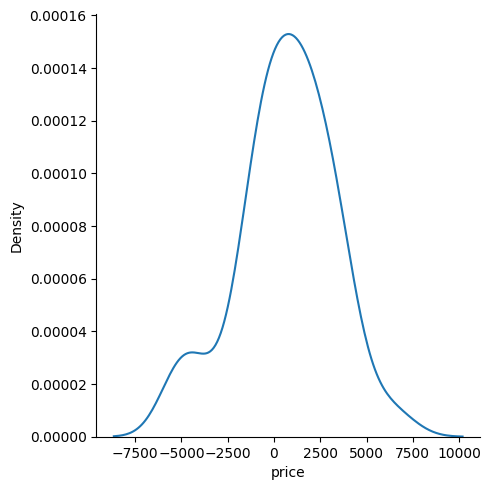

In [419]:
sns.displot(y_test - y_pred, kind = 'kde')

In [420]:
# df_compare_new = pd.DataFrame(y_test)

In [421]:
# df_compare_new.reset_index(drop = True)

In [422]:
# DF = pd.DataFrame(y_pred)

In [423]:
# DF.reset_index(drop = True)

In [424]:
# concat_df = pd.concat([df_compare_new, DF], axis=1)

In [425]:
# concat_df.columns = ['price', 'target']

In [426]:
# concat_df

In [427]:
# plt.plot(concat_df['price'], label='Actual Values')
# plt.plot(concat_df['target'], label='Predicted Values')
# plt.legend()
# plt.xticks(rotation=20)
# plt.ylabel('Values')
# plt.title('Actual vs. Predicted Values')
# plt.show()

***checking metrics***

In [428]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [429]:
mse = mean_squared_error(y_test, y_pred)

In [430]:
mae = mean_absolute_error(y_test, y_pred)

In [431]:
mse

6928406.072048533

In [432]:
mae

2073.1376350816863

In [433]:
r2 = r2_score(y_test, y_pred)


In [434]:
r2

0.8474662106718254

**good r2 score value (0.8 - 1)**

# **SAVING MODEL**

In [435]:
import joblib

In [436]:
joblib.dump({'pca': pca, 'regression': reg}, 'model_pca_regression')

['model_pca_regression']